# Lecture 13: Algoritmo de Vecino Más Cercano (kNN)

La clasificación es importante para los humanos. Siempre estamos clasificando: si alguien es amigo o enemigo, si alguien está enfermo o no, si la comida está podrida o no, entre otros. Incluso, este proceso es de vida o muerte: clasificamos si algo es peligroso o no. Por ello, los algoritmos de Machine Learning se han centrado en la clasificación de cosas: si algo es un perro o un gato, si la cara que se reconoce es la tuya para darte acceso a tu teléfono o no, si alguien tiene cáncer o no.

Hoy vamos a aprender sobre el algoritmo de vecino más cercano kNN (k-nearest neighbour). 

# 1. ¿Cómo funciona este algoritmo?

Este algoritmo clasifica elementos a partir de un principio básico: las cosas que son parecidas tienen propiedades parecidas. Por ejemplo, los postres se parecen en que son dulces, pero también porque son echos por humanos a partir de varios productos que podemos identificar (eso los separa de las frutas).

En ese sentido, el algoritmo clasifica elementos similares en una misma categoría _prestando información de otros para clasificarlo_. Es decir, a partir de sus _vecinos más cercanos_, el algoritmo clasifica los elementos no clasificados aún. Así, el algoritmo coge a los _k_ vecinos más cercanos y clasifica el nuevo elemento a partir de la clase mayoritaria que tengan sus vecinos.

Veamos un ejemplo en vivo: hagamos que alguien pruebe un alimento misterioso.

¿Qué hace esa persona?

1. **Prueba el objeto:** tiene un nuevo elemento por clasificar y _mide_ sus características (dulzura, amargura, crocancia, textura).
2. **Compara las características observadas con su base de datos (la memoria):** se ha entrenado por mucho tiempo probando cosas y recolectando sus características, por lo cual tiene puntos de comparación de los niveles de las características del nuevo elemento con las que conoce.
3. **Define la clase del objeto - qué es - a partir de lo que conoce:** reconoce las características y clasifica a partir de su cercanía con otros objetos cuya clase ya conoce.




## 1.1. Viendo como una computadora
Veamos el ejemplo como lo vería una computadora:

1. **Entrenamiento:** el computador _prueba_ varias cosas y mide sus características:

<center><img src="Table_ingredients.png" width = "750", height = "500"/></center>

2. **Reconoce patrones:** los procesa de manera tal que pueda reconocer patrones:

<center><img src="plot_ingredients.png" width = "500", height = "500"/></center>

3. **Compara los patrones con las clases:** encuentra que ellas tienen elementos comunes:

<center><img src="plot_ingredients_groups.png" width = "500", height = "500"/></center>

4. **Clasifica con sus vecinos más cercanos:** compara con los k vecinos y clasifica:

<center><img src="plot_ingredients_clas.png" width = "500", height = "500"/></center>


## 1.2. La distancia entre elementos

El computador necesita poder saber qué tan cercanos están los elementos entre sí. Para ello, generalmente se utiliza una **distancia euclidiana** para saber cuán cerca están entre ellos los elementos. La distancia entre dos vectores, $p$ y $q$, se define así:

$$ dist(p,q) = \sqrt{\sum^m_{i=1}(p_i - q_i)^2} $$

En el ejemplo del tomate, tendríamos algo así:

<center><img src="dist_table.png" width = "750", height = "300"/></center>

Ahora, debemos definir _k_, el cual es el **parámetro** que nos dice cuántos vecinos debe tomar el algoritmo para clasificar:

* Si es $k=1$, el vecino más cercano es la naranja. Por tanto, el tomate es una fruta.
* Si es $k=3$, los vecinos más cercanos son naranja, uva y nueces. Por tanto, el tomate sería una fruta.

Este ejemplo nos da a entender que **la elección de _k_ es sumamente importante: determina cuál es la clasificación**. Sin embargo, hay un dilema entre **varianza y sesgo**.

* Entre **mayor k, menor varianza** generada por datos ruidosos. Sin embargo, puede haber un **mayor sesgo**.
    - Por ejemplo, si nuestra base de datos tuviera 15 observaciones de nueces, 15 de verduras y 10 de frutas, se clasificaría el tomate como una nuez si tomáramos todas las observaciones. Se clasifica como la clase mayoritaria.
* Entre **menor k (muy pequeño)**, se podría **sesgar por datos ruidosos**.
    - Por ejemplo, si hubiéramos clasificado mal una verdura o si hay un vecino más cercano pero que es atípico, estaríamos sesgando la clasificación.
    
Por ello, **no hay una regla general de cómo escoger el _k_, pero se toma una regla práctica que:**

$$k = \sqrt{n}$$

No obstante, lo mejor es:

* **Probar varios k** en la base de entrenamiento (base de validación).
* Utilizar una **votación ponderada**.

## 1.3. Preparación de los datos

Dado que podemos tener que una variable puede tener un peso mayor solo por ser más grande, debemos procurar que:

* Los datos estén en la misma métrica.
* Reescalar los datos para que estén en rangos similares.

### 1.3.1. Reescalamiento de datos: estandarización min-max

Podemos estandarizar los datos con el proceso min-max:

$$X_0 = \frac{X-X_{min}}{X_{max} - X_{min}}$$

Es decir, se resta el mínimo del valor y se divide por el rango. Por tanto, todos los datos se encuentran entre 0 y 1 y representa qué tan lejos se está del valor mínimo.

### 1.3.2. Reescalamiento de datos: normalización por Z-score

Podemos estandarizar los datos con el Z-score:

$$X_0 = \frac{X-\mu}{\sigma}$$

Es decir, se resta la media y se divide por la desviación estánar. Por tanto, todos los datos se encuentran en términos de desviación estándar de la media.

### 1.3.3. Reescalamiento de dummies

No se puede utilizar distancia euclidiana para categorías nominales, por lo que generamos dummies. Esto es válido para una o más categorías y, además, ya están en estandarización min-max.

# 2. Predicción de cáncer de seno

Utilicemos la base de datos de cáncer de seno para clasificar si una tomografía presentada tiene cáncer o no. Vamos a cargar los datos:

In [2]:
# Importing libraries
import pandas as pd

# Importing the data
data = pd.read_csv("wisc_bc_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

> ¿Qué observamos? ¿Cómo son los datos?

## 2.1. Pre-procesamiento de los datos

### 2.1.1. Procesamiento de tipos y datos

Pregúntese los siguiente: ¿hay alguna variable que debe ser eliminada? ¿Por qué? Demos una pista: en este caso, debemos eliminar la variable `id`, dado que el modelo podría aprender de esa variable sobre las otras, identificando por el id y no por las variables que nos interesan. En ese sentido, podríamos experimentar un overfitting y, para evitarlo, reducimos dimensionalidad eliminando la columna.

No obstante, esto es general. Es decir, **debemos eliminar cualquier variable que sirva de identificación única de las observaciones para evitar sesgos**. En el caso de las personas, ello incluye cédula, nombres y apellidos. En caso de unidades territoriales, los códigos que las identifican y, en algunos casos, elementos de niveles superiores, por ejemplo el código del municipio y el del departamento. Empero, **todo depende del caso**, ya que en ocasiones necesitaremos estos datos para predecir, como, por ejemplo, predecir el número de hectáreas de coca en un municipio para un año dado.

> Teniendo en cuenta lo anterior, elimine la variable `id`: 

In [3]:
# Dropping id variable
data = data.drop("id", axis = 1)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Así mismo, debemos revisar las clases de las columnas: recuerden que en ocasiones no están como las necesitamos. El ejemplo más común ocurre cuando tenemos fechas y no las transformamos en tipo `datetime`, pero también ocurre cuando tenemos números y Python los lee como texto. ¡Debemos revisar bien cuáles son los tipos de nuestras variables!

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

No hay problema con la mayoría de datos: todos ellos ya están codificados como variables `float`. No encontramos, por ejemplo, una que sea un número, pero Python lo esté leyendo como un texto.

No obstante, **es conveniente que la variable de clasificación sea, precisamente, una categoría**. Las razones son las siguientes:

* Al modelo de Machine Learning le es más sencillo saber cuáles son los elementos de predicción y que estos corresponden a unos valores genéricos (las categorías).
* Al convertir en categoría podemos revisar si no hay errores ortográficos o de digitación (typos) en las categorías.

En ese sentido:

#### Pequeño ejercicio

> Obtenga la columna de diagnóstico y revíselo, conviértalo en tipo factor:

In [6]:
data["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [7]:
data.diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [8]:
data['diagnosis'] = pd.Categorical(data['diagnosis'], categories = ["M", "B"])
data["diagnosis"]

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['M', 'B']

### 2.3. Estandarización de los datos

Recordemos que este algoritmo es sensible a las medidas: un valor mayor tendrá más importancia que uno menor. Por esto, debemos estandarizarlo para mejorar su rendimiento. Para este caso, vamos a utilizar una estandarización min-max con el módulo `MinMaxScaler`:

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
#pip install scikit-learn

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Definiendo un dataframe
df = pd.DataFrame({"x": [3, 5, 6, 7, 10, 20], "y": [10, 20, 34, 10, 12,  14]})

# Definir el escalamiento
scaler = MinMaxScaler()

# Estandarizamos
pd.DataFrame(scaler.fit_transform(df))

,0,1
0,0.000000,0.000000
1,0.117647,0.416667
2,0.176471,1.000000
3,0.235294,0.000000
4,0.411765,0.083333
5,1.000000,0.166667


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Definimos el escalamiento
scaler = MinMaxScaler()

# Estandarizamos
data_scaled = scaler.fit_transform(data.loc[:, data.columns != 'diagnosis'])
data_scaled = pd.DataFrame(data_scaled)

data_scaled

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.001007,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.001007,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.001008,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.001008,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Normalmente no tenemos el tiempo (ni las ganas) de revisar minuciosamente todos los números. Por ello, podemos utilizar varias técnicas para para comprobar si nuestros procesos se realizaron como queríamos. Probemos uno en particular con el método `describe`:

In [13]:
# Describe: debe decirnos si hay un máximo y un mínimo de acuerdo con lo que queremos
data_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.033318,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.137187,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000944,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000985,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.009661,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> ¿Qué deberíamos revisar para saber si el escalamiento se realizó correctamente?

> **Respuesta:** debemos revisar que el mínimo sea 0 y el máximo sea 1.

### 2.4. Base de datos de testeo y entrenamiento

¡Recordes el mantra!

<center> <b> Se debe separar la base de datos entre base de entrenamiento y testeo. </b> </center> <br>


Realicemos dicho proceso son el paquete `sklearn`, con el módulo `model_selection`. Sin embargo, primero debemos separar la variable dependiente en un solo objeto para que el paquete también las separe:

In [14]:
# Revisamos la columna de diagnóstico y lo separamos de las variables independientes
y = data["diagnosis"]
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: category
Categories (2, object): ['M', 'B']

> **¡Cuidado!** En este punto ya habíamos separado las variables independientes de la dependiente: cuando escalamos las variables, removimos la dependiente porque no se podía transformar.

Ahora sí, tenemos para las **variables independientes** al objeto `data_scaled` y para la **variable independiente** tenemos el objeto, vector, `y`. Ahora sí podemos separar de manera aleatoria las bases de datos:

In [33]:
# Importamos el módulo
from sklearn.model_selection import train_test_split

# Separamos las bases de datos con un 20% de testeo y 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size = 0.2)

print(f"No. de ejemplos de entrenamiento: {y_train.shape[0]}")
print(f"No. de ejemplos de testeo: {y_test.shape[0]}")

X_train.head()

No. de ejemplos de entrenamiento: 455
No. de ejemplos de testeo: 114


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
412,0.000984,0.114345,0.404802,0.110290,0.053150,0.244290,0.126219,0.087512,0.025487,0.108081,...,0.072394,0.425640,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.159866,0.242818
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
443,0.000989,0.169861,0.291173,0.159146,0.083733,0.259908,0.077419,0.046696,0.055219,0.662626,...,0.107079,0.300906,0.094327,0.044509,0.176781,0.036994,0.031837,0.076357,0.223536,0.080808
89,0.000936,0.362488,0.187014,0.359201,0.215652,0.546809,0.351267,0.233505,0.351093,0.533333,...,0.299182,0.165778,0.293790,0.151986,0.373308,0.273219,0.207987,0.480069,0.312636,0.194740
217,0.009660,0.152350,0.262766,0.146915,0.075376,0.251964,0.121741,0.135286,0.053231,0.456566,...,0.126290,0.331823,0.124458,0.053701,0.159149,0.109061,0.153754,0.122715,0.256850,0.151187


Hay que tener cuidado en la replicabilidad de los datos. Es decir, dado que la función `train_test_split` realiza una división aleatoria de los datos, debería ocurrir que, cada vez que hagamos el proceso, realice una división diferente. Para comprobarlo, corra el código de arriba múltiples veces y revise cómo cambian los valores.

Para evitar esto, la función `train_test_split` tiene un argumento que permite **plantar una semilla**. Es decir, permite tener un estado aleatorio preciso que permita la replicabilidad en otros momentos y otras máquinas. Este argumento se llama `random_state` y se le agrega un número de su preferencia:

In [48]:
# Importamos el módulo
from sklearn.model_selection import train_test_split

# Separamos las bases de datos con un 20% de testeo y 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size = 0.2, random_state = 0)

print(f"No. de ejemplos de entrenamiento: {y_train.shape[0]}")
print(f"No. de ejemplos de testeo: {y_test.shape[0]}")

X_train.head()

No. de ejemplos de entrenamiento: 455
No. de ejemplos de testeo: 114


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
338,0.000976,0.145251,0.264457,0.142492,0.070965,0.433962,0.165266,0.058833,0.088221,0.419192,...,0.114906,0.394989,0.107426,0.048860,0.455854,0.109546,0.084265,0.223333,0.261975,0.141677
427,0.000090,0.180747,0.414948,0.172759,0.091792,0.319401,0.116711,0.084677,0.069781,0.482828,...,0.171825,0.533582,0.165745,0.074789,0.390477,0.138070,0.153914,0.257216,0.275971,0.141545
406,0.000984,0.433480,0.174163,0.418147,0.278473,0.382053,0.201307,0.128866,0.225050,0.340909,...,0.347919,0.201493,0.326162,0.187451,0.326421,0.140592,0.184505,0.387973,0.239109,0.098911
96,0.000085,0.246060,0.274941,0.234953,0.130477,0.468268,0.157015,0.058341,0.146173,0.424242,...,0.174315,0.237207,0.158026,0.076190,0.282837,0.064315,0.039776,0.202131,0.130495,0.122786
490,0.100260,0.249373,0.430504,0.237648,0.137010,0.264422,0.100055,0.040159,0.062674,0.244444,...,0.221985,0.532249,0.210817,0.107575,0.359440,0.148548,0.098243,0.217698,0.302582,0.177030


> **Nota:** la separación debe ser aleatoria para no sesgar el entrenamiento. Ahora, hay ocasiones en los que no debe ser completamente aleatoria la elección, sino cuasialeatoria (si hay desbalance en la base de datos) o escogiendo las últimas observaciones si tenemos una base de datos de series de tiempo o panel (es decir, bases de datos que varían con el tiempo).

----------------------------

### Nota sobre la notación:

La notación matemática tiene un significado incluso en el código. Se debe recordar que una matriz se escribe con una letra mayúscula y un vector se escribe con una letra minúscula. Por ello, cuando nos referimos a la matriz de covariables (variables independientes) escribimos una $X$ mayúscula y cuando nos referimos al vector de la variable de clasificación (variable dependiente) escribimos una $y$ minúscula.

En ese sentido, las matrices de covariables de entrenamiento y testeo se suelen llamar `X_train` y `X_test` (se puede escoger cualquier nombre). Así mismo, los vectores de la variable de clasificación se suelen llamar `y_train` y `y_test`.

De la misma manera, cabe resaltar que en los textos y libros de referencia también realizan esa diferencia, tal que las matrices se representan con `X`, `A` o como se desee llamar (letra mayúscula) y los vectores se representan con `y`, `b` o como se deseen llamar.


----------------------------

### 2.5. Entrenamiento del modelo

Ahora que tenemos las bases de datos separadas, podemos entrenar nuestro modelo. Para ello utilizaremos el paquete `sklearn`, el cual ofrece múltiples algoritmos de Machine Learning en el siguiente [enlace](https://scikit-learn.org/stable/). La documentación que utiliza es muy completa y hace fácil aprender cómo construir y aplicar algoritmos de ML en Python.

Por ahora, utilizaremos el módulo `neighbors` para algoritmos de vecinos más cercanos. En este caso, utilizaremos `KNeighborsClassifier`:

In [55]:
# Se importa la librería y módulo
from sklearn.neighbors import KNeighborsClassifier

# Se especifica el algoritmo
knn = KNeighborsClassifier(n_neighbors = 3)

# Se entrena el modelo con las bases de datos de entrenamiento
knn.fit(X_train, y_train)

# Se predice el resultado
y_pred = knn.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B'], dtype=object)

In [36]:
knn.classes_

array(['B', 'M'], dtype=object)

Miremos que la predicción corresponde con las categorías que utilizamos anteriormente. Además, utiliza las variables independientes de **testeo** para realizar la predicción, así que `y_pred` no son los valores reales, sino los valores que el modelo predice que debe ser el valor real a partir de las variables independientes.

In [56]:
# Importo la librería
import numpy as np

# Configuración de filas
pd.set_option('display.max_rows', 114)

# Creo un dataframe con los valores reales y los predichos
df_ev = pd.DataFrame({"real": y_test, "pred": y_pred})

# Evalúo si coinciden o no
df_ev["match"] = np.where(df_ev.real == df_ev.pred, 1, 0)

df_ev.head(10)

,real,pred,match
512,M,M,1
457,B,B,1
439,B,B,1
298,B,B,1
37,B,B,1
515,B,B,1
382,B,B,1
310,B,B,1
538,B,B,1
345,B,B,1


In [57]:
round(df_ev["match"].sum()/len(df_ev["match"]), 4)

0.9561

In [59]:
df_ev["match"][df_ev.pred == "B"].sum()/len(df_ev["match"][df_ev.real == "B"])

1.0

### 2.6. Evaluación del modelo

### 2.6.1. Precisión

Resulta muy importante observar cómo se desempeña el modelo, por lo cual debemos evaluarlo. Para los casos de clasificación resulta más sencillo entender la lógica detrás, ya que solamente debemos clasificar entre aquellas predicciones que realizó bien y las que realizó mal. Para ello, utilizamos la precisión (_acuracy_ en inglés) para evaluar qué tan bueno fue el modelo para predecir ambas clases:

In [64]:
# Se importa el módulo de métricas
from sklearn import metrics

# Se calcula la precisión del modelo
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))

Accuracy: 0.9561


Esto simplemente se calcula de la siguiente manera:

$$ Accuracy = \frac{Valores correctamente predichos}{Total}$$

### 2.6.2. Matriz de confusión

¡Es un buen número! Alto para un modelo de ML. Sin embargo, debemos tener en cuenta que **todo depende del problema específico que estamos viendo**. Veamos un poco más a profundidad esto con las **matrices de confusión**.

Las matrices de confusión son herramientas de visualización que ayudan a entender el desempeño del modelo: en las columnas tenemos las predicciones y en las filas tenemos los valores reales. Su organización permite ver los verdaderos positivos, los verdaderos negativos, los falsos positivos y los falsos negativos.

<center><img src="confusion_matrix.png" width = "450", height = "300"/></center>

Construyamos una a continuación:

In [69]:
# Se importa el módulo
from sklearn.metrics import confusion_matrix

# Se construye la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[67,  0],
       [ 5, 42]], dtype=int64)

No se ve muy bien esta matriz y tampoco se entiende muy bien. Utilicemos el siguiente código para construirla visualmente más entendible:

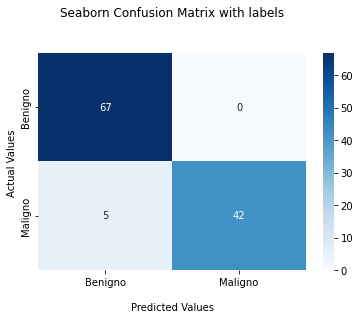

In [70]:
# Se importan las librerías
import seaborn as sns
import matplotlib.pyplot as plt

# Se construye un mapa de calor
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')

# Se agrega título y nombre a los ejes
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Se agregan subtítulos de categoría a la tabla
ax.xaxis.set_ticklabels(['Benigno', 'Maligno'])
ax.yaxis.set_ticklabels(['Benigno', 'Maligno'])

# Se muestra la imagen
plt.show()

### 2.6.3. Sensitividad & especificidad

Ahora, no siempre conviene mirar el desempeño del modelo en ambos campos (positivos y negativos), sino en uno de ellos en específico. Para ello se calcula la **sensitividad (_sensitivity_)** y la **especificidad (_specificity_)**. Ellas se definen como:

* La **Sensitividad** mide la proporción de verdaderos positivos que fueron correctamente clasificados.

$$ Sensitivity = \frac{TP}{TP+FN} $$

* La **Especificidad** mide la proporción de verdaderos negativos que fueron correctamente clasificados.

$$ Specificity = \frac{TN}{TN+FP} $$

A la vez, tenemos en nuestra nueva notación que la precisión es

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

Calculemos la sensitividad y especificidad:

In [71]:
# Se construye la matriz
confusion = confusion_matrix(y_test, y_pred)

# Se guardan los valores
TN = confusion[1,1] # true negatives 
TP = confusion[0,0] # true positive
FN = confusion[0,1] # false negatives 
FP = confusion[1,0] # false positives

print("Sensitividad del modelo: \t{0}".format(TP / float(TP+FN)))
print("Especificidad del modelo: \t{0}".format(TN / float(TN+FP)))

Sensitividad del modelo: 	1.0
Especificidad del modelo: 	0.8936170212765957


### 2.6.4. Precision & Recall

La precision y el recall son otras dos medidas que intentan ver otro tipo de desempeño del modelo. Para este caso, tenemos que:

* La **Precision** mide la proporción de positivos que son efectivamente positivos. Es decir, ya no mira la proporción de positivos correctamente clasificados, sino que, de los que se clasificaron como positivos, cuántos son realmente positivos.

$$ precision = \frac{TP}{TP + FP}$$

* La **Recall** mide qué tan completos están los resultados. En este caso, se pregunta cuál es la proporción de positivos clasificados como tal entre los que verdaderamente son positivos. Es decir, recall y sensitivity son lo mismo, solo que la interpretación difiere.

$$ recall = \frac{TP}{TP + FN}$$

In [44]:
# Se construye la matriz
confusion = confusion_matrix(y_test, y_pred)

# Se guardan los valores
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print("Precision del modelo: \t{0}".format(TP / float(TP+FP)))
print("Recall del modelo: \t{0}".format(TP / float(TP+FN)))

Precision del modelo: 	1.0
Recall del modelo: 	0.9148936170212766


### 2.6.5. F1 Score

El F1 Score es una medida que combina, a la vez, la precision y el recall del modelo. El F1 Score es la media armónica de ambos, por lo cual su fórmula es la siguiente:

$$ F1 = \frac{2*precision*recall}{recall+precision} = \frac{2*TP}{2*TP + FP + FN} $$

In [45]:
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [72]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, pos_label = "B")

0.9640287769784173

# 3. Perfeccionamiento del modelo de ML

Siempre podemos mejorar. En este caso, vamos a hacer varios procesos para mejorar nuestro desempeño del modelo. En ese sentido, hay varias técnicas. No obstante, primero debemos crear una base de datos de validación:

In [73]:
# Importamos el módulo
from sklearn.model_selection import train_test_split

# Separamos las bases de datos con un 20% de testeo y 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size = 0.2, random_state = 0)

# Separamos las bases de datos con un 20% de validación y 80% de entrenamiento
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

print(f"No. de ejemplos de entrenamiento: {y_train.shape[0]}")
print(f"No. de ejemplos de validación: {y_val.shape[0]}")
print(f"No. de ejemplos de testeo: {y_test.shape[0]}")

No. de ejemplos de entrenamiento: 364
No. de ejemplos de validación: 91
No. de ejemplos de testeo: 114


> ¡Cuidado! Este ejemplo está peligrosamente en el límite de datos para la división con la base de datos de validación. No hay muchos datos, entonces siempre se debe preguntar si es conveniente o no separar las bases de datos.

## 3.1. Tuneo de parámetros manual

Una manera para mejorar el rendimiento de nuestro modelo es realizar ciclos para elegir los hiperparámetros que nos otorgarán un mejor rendimiento. Intentemos algo sencillo: revisemos diferentes valores de k vecinos.

Ahora, para evaluar cuál es el mejor modelo, debemos **definir cuál es la métrica adecuada** para perfeccionarlo. Para este caso, dado que nos resultan importantes tanto predecir bien los verdaderos positivos como negativos, vamos a utilizar el F1 Score.

In [82]:
import warnings
warnings.filterwarnings('ignore')

# Se importa la librería y módulo
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Se empieza a contar el tiempo
start = time.time()
print("BOE")

# Se crea una base de datos para guardar los resultados
res = pd.DataFrame(columns = ["k", "f1_score"])

# Se especifica el algoritmo
for k in range(1, 251):
    #print(k)
    knn = KNeighborsClassifier(n_neighbors = k)

    # Se entrena el modelo con las bases de datos de entrenamiento
    knn.fit(X_train, y_train)

    # Se predice el resultado
    y_pred = knn.predict(X_val)
    
    # Se agregan los resultados
    res = res.append({"k": k, "f1_score" : f1_score(y_val, y_pred, pos_label = "B")}, ignore_index = True)
    
    
print("EOF")
end = time.time()
print("Elapsed time: ", end - start)

BOE
EOF
Elapsed time:  3.6690351963043213


Veamos los resultados:

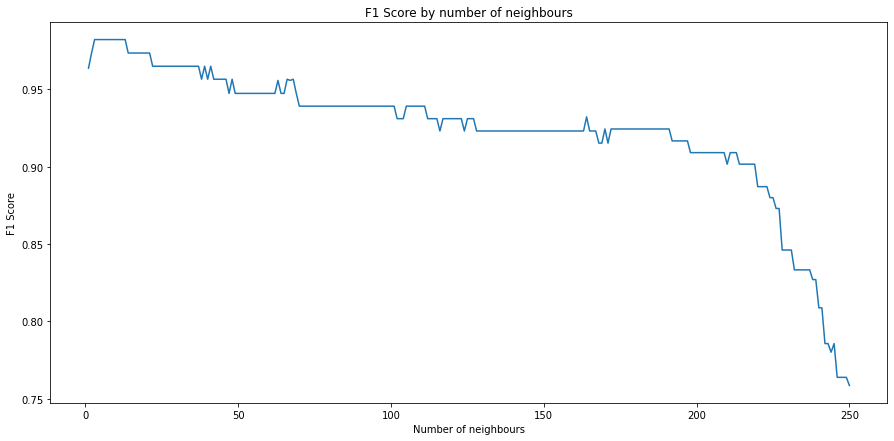

In [83]:
plt.figure(figsize = (15, 7))
sns.lineplot(x = "k", y = "f1_score", data = res)
plt.title("F1 Score by number of neighbours")
plt.xlabel("Number of neighbours");plt.ylabel("F1 Score")
plt.show()

Ahora, encontremos aquellos valores donde se maximiza el F1 Score:

In [76]:
res[res.f1_score == res.f1_score.max()]

,k,f1_score
2,3.0,0.982143
3,4.0,0.982143
4,5.0,0.982143
5,6.0,0.982143
6,7.0,0.982143
7,8.0,0.982143
8,9.0,0.982143
9,10.0,0.982143
10,11.0,0.982143
11,12.0,0.982143


Al parecer, tenemos varios candidatos. En ocasiones, menos es mejor, entonces podríamos utilizar un cómodo `k=3`. Pero revisemos con precisión balanceada:

In [85]:
import warnings
warnings.filterwarnings('ignore')

# Se importa la librería y módulo
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Se empieza a contar el tiempo
start = time.time()
print("BOE")

# Se crea una base de datos para guardar los resultados
res = pd.DataFrame(columns = ["k", "balanced_accuracy"])

# Se especifica el algoritmo
for k in range(1, 251):
    #print(k)
    knn = KNeighborsClassifier(n_neighbors = k)

    # Se entrena el modelo con las bases de datos de entrenamiento
    knn.fit(X_train, y_train)

    # Se predice el resultado
    y_pred = knn.predict(X_val)
    
    # Se agregan los resultados
    res = res.append({"k": k, "balanced_accuracy" : balanced_accuracy_score(y_val, y_pred)}, ignore_index = True)
    
    
print("EOF")
end = time.time()
print("Elapsed time: ", end - start)

BOE
EOF
Elapsed time:  3.314575672149658


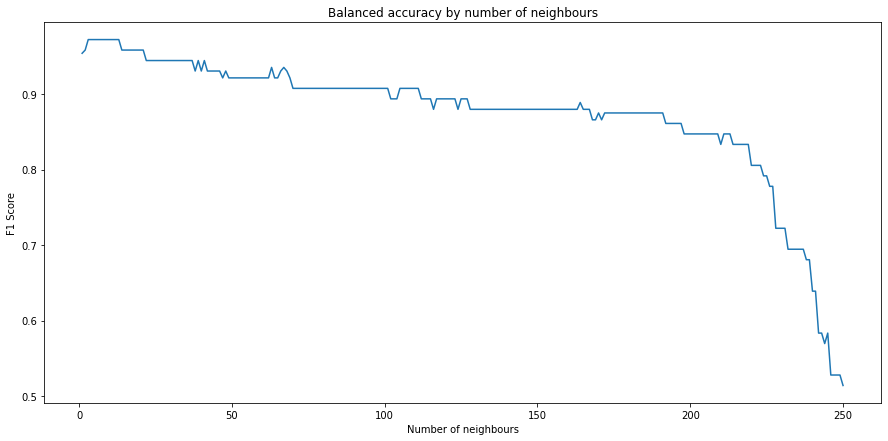

In [86]:
plt.figure(figsize = (15, 7))
sns.lineplot(x = "k", y = "balanced_accuracy", data = res)
plt.title("Balanced accuracy by number of neighbours")
plt.xlabel("Number of neighbours");plt.ylabel("F1 Score")
plt.show()

In [53]:
res[res.balanced_accuracy == res.balanced_accuracy.max()]

,k,balanced_accuracy
2,3.0,0.972222
3,4.0,0.972222
4,5.0,0.972222
5,6.0,0.972222
6,7.0,0.972222
7,8.0,0.972222
8,9.0,0.972222
9,10.0,0.972222
10,11.0,0.972222
11,12.0,0.972222


¿Y si revisamos los modelos con la sensitividad y la especificidad? ¿Tendremos resultados diferentes?

In [79]:
import warnings
warnings.filterwarnings('ignore')

# Se importa la librería y módulo
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Se empieza a contar el tiempo
start = time.time()
print("BOE")

# Se crea una base de datos para guardar los resultados
res = pd.DataFrame(columns = ["k", "sensitivity", "specificity"])

# Se especifica el algoritmo
for k in range(1, 301):
    #print(k)
    knn = KNeighborsClassifier(n_neighbors = k)

    # Se entrena el modelo con las bases de datos de entrenamiento
    knn.fit(X_train, y_train)

    # Se predice el resultado
    y_pred = knn.predict(X_val)
    
    # Se construye la matriz
    confusion = confusion_matrix(y_val, y_pred)

    # Se guardan los valores
    TN = confusion[1,1] # true negatives 
    TP = confusion[0,0] # true positive
    FN = confusion[0,1] # false negatives 
    FP = confusion[1,0] # false positives
    
    # Se agregan los resultados
    res = res.append({"k": k, "sensitivity" : TP / float(TP+FN), "specificity": TN / float(TN+FP)}, ignore_index = True)
    
    
print("EOF")
end = time.time()
print("Elapsed time: ", end - start)


BOE
EOF
Elapsed time:  4.136751174926758


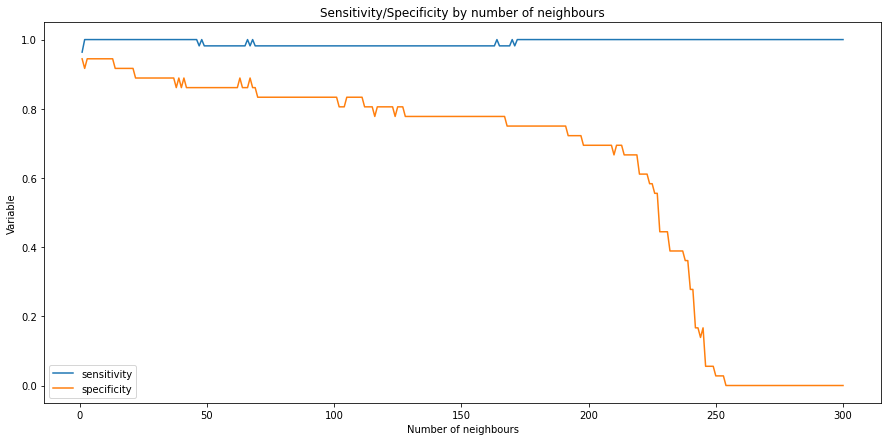

In [80]:
plt.figure(figsize = (15, 7))
sns.lineplot(x = "k", y = "sensitivity", data = res, label = "sensitivity")
sns.lineplot(x = "k", y = "specificity", data = res, label = "specificity")
plt.title("Sensitivity/Specificity by number of neighbours")
plt.xlabel("Number of neighbours");plt.ylabel("Variable")
plt.show()

¡Resulta lo mismo! Al parecer, tenemos un buen modelo al haber escogido `k = 3`. Ahora analicemos cómo nos fue con nuestro modelo final la base de datos de testeo:

In [95]:
# Se importa la librería y módulo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Separamos las bases de datos con un 20% de testeo y 80% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size = 0.2, random_state = 0)

# Se especifica el algoritmo
knn = KNeighborsClassifier(n_neighbors = 3)

# Se entrena el modelo con las bases de datos de entrenamiento
knn.fit(X_train, y_train)

# Se predice el resultado
y_pred = knn.predict(X_test)

# Evaluación Final
print("F1-Score Final:\t\t\t", round(f1_score(y_test, y_pred, pos_label = "B"), 4))
print("Precisión Balanceada Final:\t", round(balanced_accuracy_score(y_test, y_pred), 4))

F1-Score Final:			 0.964
Precisión Balanceada Final:	 0.9468
